### Import

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

In [9]:
# Customazation oif the Variables, yes =1 and no =0
# simplification of countries
simp_country=1
# Simplification of currency
simp_currency=1
# Simplification of main_category:
simp_category=1
# overestimation
over_estimation=0
# Underestimation
under_estimation=0
# Categorization of the backers count
# Attention: Very costly computation 
cat_backers_count=0

In [10]:
# Chosen Variables
not_used_list=['city', 'usd_pledged','sub_category','backers_count','launched_year']
num_list=['goal_usd']
cat_list=['country','currency','main_category','creator_projects']

In [11]:
# The variable city contain over 11000 different entries, ohe possible with so many variables?
# For the time being, city variable will be dropped

### data import

In [12]:
imp=r".../GitHub/MAY23_BDA_INT_Crowdfunding/data/kaggle/Kaggle_deduplicated.csv"
imp=r"C:\Users\Franz.000\Documents\GitHub\MAY23_BDA_INT_Crowdfunding\data\kaggle\Kaggle_deduplicated.csv"
df=pd.read_csv(imp,index_col='id')
df.drop(columns='Unnamed: 0',inplace=True)
display(df.head())
display(df.info())

,currency,backers_count,country,status,usd_pledged,main_category,sub_category,goal_usd,city,duration,launched_year,creator_projects
id,,,,,,,,,,,,
1714728788,CAD,16,CA,failed,577.902078,food,Farms,785.82065,Victoria,60.0,2018,1
1639965256,USD,7,US,successful,211.000000,publishing,Academic,93.00000,San Diego,24.0,2014,1
1582062943,USD,99,US,successful,4697.000000,food,Small Batch,1500.00000,Philadelphia,30.0,2020,1
1888984372,USD,3,US,failed,222.000000,technology,Gadgets,25000.00000,Chicago,60.0,2019,1
1409770586,USD,100,US,successful,5410.000000,publishing,Radio & Podcasts,5000.00000,Madrid,30.0,2015,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180677 entries, 1714728788 to 1126079486
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   currency          180677 non-null  object 
 1   backers_count     180677 non-null  int64  
 2   country           180677 non-null  object 
 3   status            180677 non-null  object 
 4   usd_pledged       180677 non-null  float64
 5   main_category     180677 non-null  object 
 6   sub_category      180677 non-null  object 
 7   goal_usd          180677 non-null  float64
 8   city              180677 non-null  object 
 9   duration          180677 non-null  float64
 10  launched_year     180677 non-null  int64  
 11  creator_projects  180677 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.9+ MB


None

In [13]:
df['status'].replace(['successful','failed'],[1,0],inplace=True)

In [14]:
pd.crosstab(df.country,df.status,normalize='index')

status,0,1
country,,
AT,0.600000,0.400000
AU,0.483663,0.516337
BE,0.562842,0.437158
CA,0.439765,0.560235
CH,0.549451,0.450549
DE,0.536169,0.463831
DK,0.427329,0.572671
ES,0.543816,0.456184
FR,0.439464,0.560536


### Variable Simplifications

In [15]:
# Categorisation of the backers count
if cat_backers_count==1:
    df['backers_count'].replace(range(0,101),'0-100',inplace=True)
    df['backers_count'].replace(range(101,1001),'101-1000',inplace=True)
    df['backers_count'].replace(range(1001,10001),'1001-10000',inplace=True)
    df['backers_count'].replace(range(10001,200000),'10000+',inplace=True)

In [16]:
# Potential Simplification of variables
if simp_country==1:
    df['country'].replace(['GB','CA'],'GB,CA',inplace=True)
    df['country'].replace(['DE','FR','IT','ES','NL','SE','DK','CH','IE','BE','AT','NO','LU','PL','GR','SI'],'Europe',inplace=True)
    df['country'].replace(['HK','SG','JP'],'Asia',inplace=True)
    df['country'].replace(['MX'],'South America and Mexico',inplace=True)
    df['country'].replace(['AU','NZ'],'Australia and new Zealand',inplace=True)

In [17]:
if simp_category==1:
    df['main_category'].replace(['music','film & video','games','comics','dance'],'Entertainment',inplace=True)
    df['main_category'].replace(['art','fashion','design','photography','theater'],'Culture',inplace=True)
    df['main_category'].replace(['technology','publishing','food','crafts','journalism'],'Others',inplace=True)

In [18]:
if simp_currency==1:
    df['currency'].replace(['AUD','MXN','SEK','HKD','NZD','DKK','SGD','CHF','JPY','NOK','PLN'],'Others',inplace=True)

### Split of the data

In [19]:
# Target Variable
df['status'].replace(['successful','failed'],[1,0],inplace=True)
df_y=df['status']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='status',axis=1),df_y,test_size=0.2,random_state=0)

### Preprocessing of the data

In [21]:
# standardizing of the numerical variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# 
X_train_num=X_train[num_list]
X_test_num=X_test[num_list]
X_train_num[num_list]=sc.fit_transform(X_train[num_list])
X_test_num[num_list]=sc.fit_transform(X_test[num_list])

In [22]:
# OneHotEncoding of the categorical variable of X_train
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
ohe_train=ohe.fit_transform(X_train[cat_list])
column_name=ohe.get_feature_names_out(cat_list)
X_train_ohe=pd.DataFrame(ohe_train,columns=column_name,index=X_train.index)

In [23]:
# OHE X_test variable
ohe2=OneHotEncoder(sparse=False)
ohe_test=ohe2.fit_transform(X_test[cat_list])
column_name2=ohe2.get_feature_names_out(cat_list)
X_test_ohe=pd.DataFrame(ohe_test,columns=column_name2,index=X_test.index)

In [24]:
X_train_merge_org=pd.concat([X_train_num,X_train_ohe],axis=1)
X_test_merge=pd.concat([X_test_num,X_test_ohe],axis=1)
X_train_merge_org

,goal_usd,country_Asia,country_Australia and new Zealand,country_Europe,"country_GB,CA",country_South America and Mexico,country_US,currency_CAD,currency_EUR,currency_GBP,currency_Others,currency_USD,main_category_Culture,main_category_Entertainment,main_category_Others,creator_projects_1,creator_projects_16-30,creator_projects_2-5,creator_projects_31+,creator_projects_6-15
id,,,,,,,,,,,,,,,,,,,,
1145791306,-0.017587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2015661976,-0.030481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1806299970,-0.034489,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1123073636,-0.031519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
55509224,-0.034350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964151269,-0.033475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2005028253,-0.033490,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
958979340,-0.033270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Resampling and Analysisvariable

In [25]:
if over_estimation==1:
    from imblearn.over_sampling import RandomOverSampler 
    rOs=RandomOverSampler()
    X_over,y_over=rOs.fit_resample(X_train_merge_org,y_train)
    X_train_merge=X_over
    y_train=y_over
else:
    X_train_merge=X_train_merge_org

In [26]:
if under_estimation==1:
    from imblearn.under_sampling import RandomUnderSampler
    rUs=RandomUnderSampler()
    X_under,y_under=rUs.fit_resample(X_train_merge_org,y_train)
    X_train_merge=X_under
    y_train=y_under

In [27]:
len(X_train_merge)

144541

### Modeling of the data

In [28]:
# Maschine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

In [29]:
# Potential one hot encoder problem
# Some values are unique which cuases a mismatch in columns
for item in X_train_merge.columns:
    if item not in X_test_merge.columns:
        print('Error',item)
        X_test_merge[item]=0

In [30]:
# Potential one hot encoder problem
for item in X_test_merge.columns:
    if item not in X_train_merge.columns:
        print('Error',item)
        X_train_merge[item]=0

In [31]:
# Classification tree
tree=DecisionTreeClassifier()
tree.fit(X_train_merge,y_train)
tree_pred=tree.predict(X_test_merge)
print('Decision Tree accuracy:',tree.score(X_test_merge,y_test))

Decision Tree accuracy: 0.6411058224485278


In [32]:
# Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train_merge,y_train)
rfc_pred=rfc.predict(X_test_merge)
print('Random Forest accuracy:',rfc.score(X_test_merge,y_test))

Random Forest accuracy: 0.6370932034536196


In [33]:
# Logistical Regression
log=LogisticRegression()
log.fit(X_train_merge,y_train)
log_pred=log.predict(X_test_merge)
print('Logistical Regression accuracy:',log.score(X_test_merge,y_test))

Logistical Regression accuracy: 0.6597575824662386


In [34]:
# Crosstab
print('Decision Tree')
display(pd.crosstab(y_test,tree_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Random Forest')
display(pd.crosstab(y_test,rfc_pred,normalize=True, rownames=['True'], colnames=['Prediction']))
print('Logistical Regression')
display(pd.crosstab(y_test,log_pred,normalize=True, rownames=['True'], colnames=['Prediction']))

Decision Tree


Prediction,0,1
True,,
0,0.132499,0.280247
1,0.078647,0.508606


Random Forest


Prediction,0,1
True,,
0,0.120683,0.292063
1,0.070843,0.516410


Logistical Regression


Prediction,0,1
True,,
0,0.158374,0.254372
1,0.085870,0.501384


In [35]:
# Classification Report
from sklearn.metrics import classification_report
print('Decision Tree \n',classification_report(y_test,tree_pred))
print('Random Forest \n',classification_report(y_test,rfc_pred))
print('Logistical Regression \n',classification_report(y_test,log_pred))

Decision Tree 
               precision    recall  f1-score   support

           0       0.63      0.32      0.42     14915
           1       0.64      0.87      0.74     21221

    accuracy                           0.64     36136
   macro avg       0.64      0.59      0.58     36136
weighted avg       0.64      0.64      0.61     36136

Random Forest 
               precision    recall  f1-score   support

           0       0.63      0.29      0.40     14915
           1       0.64      0.88      0.74     21221

    accuracy                           0.64     36136
   macro avg       0.63      0.59      0.57     36136
weighted avg       0.64      0.64      0.60     36136

Logistical Regression 
               precision    recall  f1-score   support

           0       0.65      0.38      0.48     14915
           1       0.66      0.85      0.75     21221

    accuracy                           0.66     36136
   macro avg       0.66      0.62      0.61     36136
weighted avg      

In [36]:
df_y.value_counts(normalize=True)

1    0.58169
0    0.41831
Name: status, dtype: float64

In [37]:
# Buildung the Coefficient DataFrame
log_importance=pd.DataFrame({'Variables':X_train_merge.columns,'Coefficient':log.coef_[0]})
log_importance_negatives=log_importance.sort_values('Coefficient',ascending=True)
log_importance_positives=log_importance.sort_values('Coefficient',ascending=False)

In [38]:
display(log_importance_negatives.head())
display(log_importance_positives.head())

,Variables,Coefficient
0,goal_usd,-16.331057
15,creator_projects_1,-1.716606
17,creator_projects_2-5,-0.823954
5,country_South America and Mexico,-0.532928
14,main_category_Others,-0.162137


,Variables,Coefficient
16,creator_projects_16-30,1.614308
18,creator_projects_31+,1.170958
1,country_Asia,0.775024
13,main_category_Entertainment,0.651088
19,creator_projects_6-15,0.429060


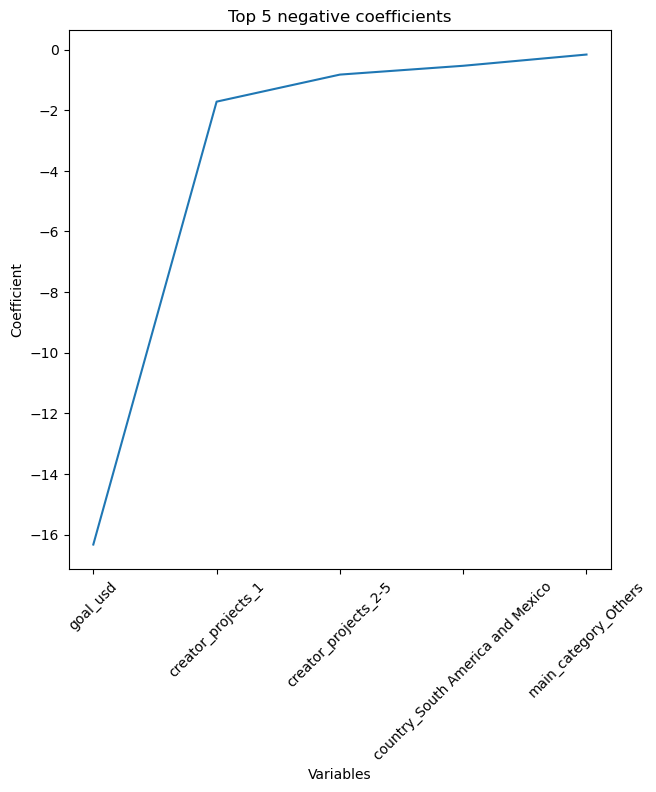

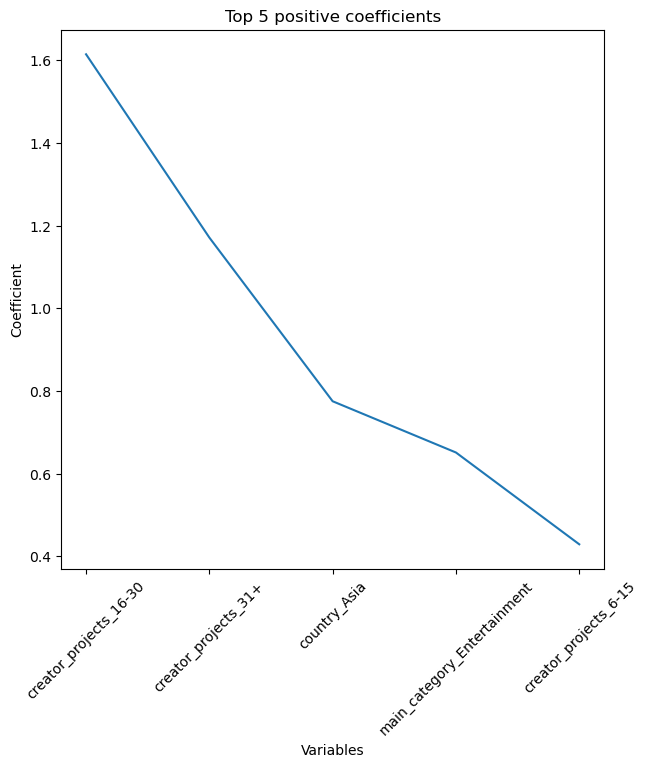

In [39]:
# Plotting the Coefficeint DataFrame
plt.figure(figsize=[7,7])
plt.plot(log_importance_negatives['Variables'][0:5],log_importance_negatives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 negative coefficients');
plt.show()
plt.figure(figsize=[7,7])
plt.plot(log_importance_positives['Variables'][0:5],log_importance_positives['Coefficient'][0:5])
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.title('Top 5 positive coefficients');

#### Optimize (best) model

In [40]:
# Logistical Regression
log2=LogisticRegression(max_iter=10000)
log2.fit(X_train_merge,y_train)
log2_pred=log.predict(X_test_merge)
print('(Optimized) Logistical Regression accuracy:',log2.score(X_test_merge,y_test))

(Optimized) Logistical Regression accuracy: 0.6597022359973433


In [41]:
# confusion matrix
print('Logistical Regression')
display(pd.crosstab(y_test,log2_pred,normalize=True, rownames=['True'], colnames=['Prediction'])) # no substantial difference

Logistical Regression


Prediction,0,1
True,,
0,0.158374,0.254372
1,0.085870,0.501384


In [42]:
# classification report
print('Logistical Regression \n',classification_report(y_test,log2_pred))

Logistical Regression 
               precision    recall  f1-score   support

           0       0.65      0.38      0.48     14915
           1       0.66      0.85      0.75     21221

    accuracy                           0.66     36136
   macro avg       0.66      0.62      0.61     36136
weighted avg       0.66      0.66      0.64     36136

